In [1]:
import pandas as pd 
import numpy as np 
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# 讀取資料 from 
train = pd.read_csv("C:/Users/User/Desktop/kaggle/Titanic/train.csv")
test  = pd.read_csv("C:/Users/User/Desktop//kaggle/Titanic//test.csv")

train['Sex'] = train['Sex'].map ( { 'female':0 , 'male':1 } ).astype(int)


train.info()
#train.describe()
# 缺失的有Age和Cabin


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.1+ KB


Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64

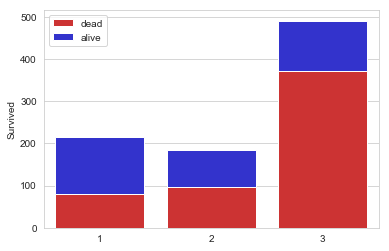

In [54]:
y1 = train[train.Survived==0].groupby('Pclass')['Survived'].count()
y2 = train[train.Survived==1].groupby('Pclass')['Survived'].count()
pos=[1,2,3]
ax = sns.barplot(pos,y1,color='r',saturation=0.6,label='dead')
ax = sns.barplot(pos,y2,color='b',saturation=0.6,label='alive',bottom=y1)
plt.legend()
#艙等對死亡率
y1

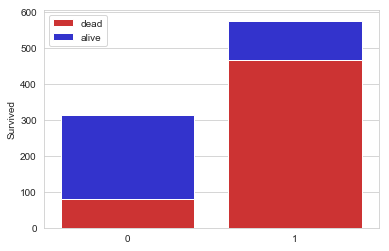

In [3]:
y1 = train[train.Survived==0].groupby('Sex')['Survived'].count()
y2 = train[train.Survived==1].groupby('Sex')['Survived'].count()
pos=[0,1]
ax = sns.barplot(pos,y1,color='r',saturation=0.6,label='dead')
ax = sns.barplot(pos,y2,color='b',saturation=0.6,label='alive',bottom=y1)
plt.legend()
#性別對死亡率 

0.2937853107344633 0.4061624649859944


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


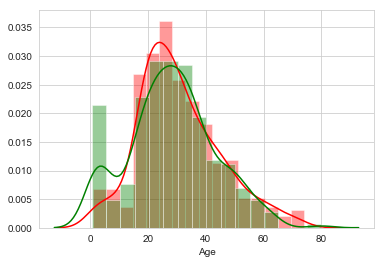

In [4]:
k1 = sns.distplot(train[train.Survived==0].Age.dropna(),  color='r', label='dead')
k2 = sns.distplot(train[train.Survived==1].Age.dropna(),  color='g', label='alive')

#年齡對死亡率
y1=train[(train.Age.isnull())]['Survived'].mean()
y2=train[(train.Age.notnull())]['Survived'].mean()
print(y1,y2)
#年齡是否缺失對死亡率判斷


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


1.0
0.38245219347581555


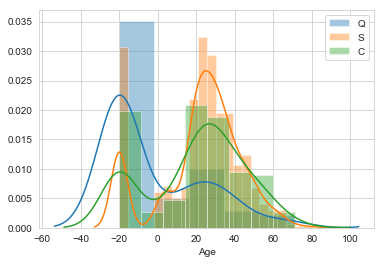

In [9]:
Q = train[train.Embarked=='Q'].Age.fillna(-20)
S = train[train.Embarked=='S'].Age.fillna(-20)
C = train[train.Embarked=='C'].Age.fillna(-20)
sns.distplot(Q,label='Q')
sns.distplot(S,label='S')
sns.distplot(C,label='C')
plt.legend()
#Q岸上船的年齡缺失很多 
#C岸的年齡較少缺失 年齡層也較為平均
print(train[(train['Embarked'].isnull())]['Survived'].mean())
print(train[(train['Embarked'].notnull())]['Survived'].mean())

In [6]:
print(train[(train['Cabin'].isnull())]['Survived'].mean())
print(train[(train['Cabin'].notnull())]['Survived'].mean())
#Cabin缺失非常多 缺失的生存率低於三成, 而有紀錄的生存率高達6成6


0.29985443959243085
0.6666666666666666


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


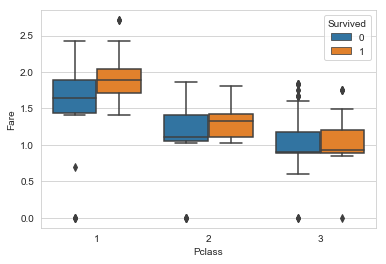

In [46]:
train = pd.read_csv("C:/Users/User/Desktop/kaggle/Titanic/train.csv")

#性別 票價 艙等 為目前看起來最明顯的特徵 Cabin Sci和其他的稍待處理
train['Fare'] = train['Fare'].map(lambda x : np.log10(x) if x>0 else 0)
sns.boxplot(x=train['Pclass'],y=train['Fare'],hue=train['Survived'])
#發現有數位票價為0的情況 由此開始處理
train[train['Fare']==0]

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


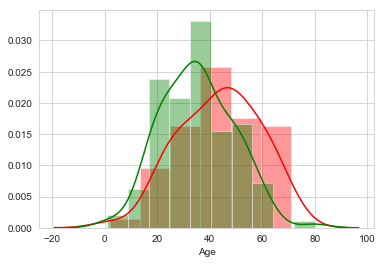

In [18]:
train[(train['Pclass']==1) & (train['Survived']==0)].Age.dropna()
train[(train['Pclass']==1) & (train['Survived']==1)].Age.dropna()

k1 = sns.distplot(train[(train['Pclass']==1) & (train['Survived']==0)].Age.dropna(),  color='r', label='dead')
k2 = sns.distplot(train[(train['Pclass']==1) & (train['Survived']==1)].Age.dropna(),  color='g', label='alive')

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


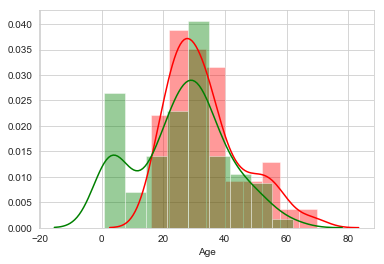

In [19]:
train[(train['Pclass']==2) & (train['Survived']==0)].Age.dropna()
train[(train['Pclass']==2) & (train['Survived']==1)].Age.dropna()

k1 = sns.distplot(train[(train['Pclass']==2) & (train['Survived']==0)].Age.dropna(),  color='r', label='dead')
k2 = sns.distplot(train[(train['Pclass']==2) & (train['Survived']==1)].Age.dropna(),  color='g', label='alive')